In [33]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import os
import re
import matplotlib.pyplot as plt
from itertools import combinations
from numpy import dot
from numpy.linalg import norm

In [2]:
def parse_hmm(file_path: str, n_promoters: int) -> list:
    ### Yields a matrix of n*m, where n - base pair length of a sequence , m - 4 nucleotides (A,T,C,G)
    n = [str(x) for x in list(range(0,n_promoters + 1))]
    promoter_list = []
    
    with open(file_path, "rt") as file:
        for line in file:
            line = line.split()
            if line[0] in n:
                promoter_list.append(line[1:5])
    return promoter_list

def convert_to_probability(hmm_scores: list, background_probability: float):
    ### Yields a matrix of n*m, where n - base pair length of a sequence , m - 4 nucleotides (A,T,C,G)
    probabilities_list = []
    
    for position in hmm_scores:
        ### Cinverting from log-odds to the regular probabilities
        probabilities = [background_probability * np.exp(float(score)) for score in position]
        ### Normalizing regular probabilities
        probabilities = [p / sum(probabilities) for p in probabilities]
        
        probabilities_list.append(probabilities)
    
    return np.array(probabilities_list)

def kl_divergence(profile1, profile2):
    kl_divergences = []
    for pos in range(profile1.shape[0]):
        kl = entropy(profile1[pos], profile2[pos]) 
        kl_divergences.append(kl)
    return np.array(kl_divergences)

In [19]:
athaliana = parse_hmm("hmm_profiles/athaliana_200_hmm_profile.txt", 401)
print(athaliana)

athaliana = convert_to_probability(athaliana, 0.25)
hsapiens = convert_to_probability(parse_hmm("hmm_profiles/hsapiens_200_hmm_profile.txt", 401), 0.25)
dmelanogaster = convert_to_probability(parse_hmm("hmm_profiles/dmelanogaster_200_hmm_profile.txt", 401), 0.25)

hsapiens_athaliana_kl = kl_divergence(athaliana, hsapiens)
hsapiens_dmelanogaster_kl = kl_divergence(hsapiens, dmelanogaster)
dmelanogaster_hsapiens_kl = kl_divergence(dmelanogaster, hsapiens)


[['1.04770', '1.82003', '1.86758', '1.10040'], ['1.04775', '1.80786', '1.86214', '1.10887'], ['1.04456', '1.83753', '1.87052', '1.09393'], ['1.02642', '1.81076', '1.88561', '1.11948'], ['1.02609', '1.82747', '1.89150', '1.10888'], ['1.03747', '1.77932', '1.86697', '1.13225'], ['1.05227', '1.82662', '1.86076', '1.09559'], ['1.05330', '1.81825', '1.82225', '1.11705'], ['1.03586', '1.85262', '1.84046', '1.11015'], ['1.03797', '1.81925', '1.85352', '1.11782'], ['1.04824', '1.80714', '1.83348', '1.12249'], ['1.04127', '1.79854', '1.88394', '1.11029'], ['1.02699', '1.83498', '1.86177', '1.11809'], ['1.04141', '1.80519', '1.85671', '1.11958'], ['1.03760', '1.80785', '1.85646', '1.12250'], ['1.03980', '1.80732', '1.87473', '1.11174'], ['1.04862', '1.83469', '1.82552', '1.11236'], ['1.02985', '1.83825', '1.83853', '1.12456'], ['1.02773', '1.83754', '1.85238', '1.12052'], ['1.05317', '1.80693', '1.83779', '1.11522'], ['1.03996', '1.83448', '1.87166', '1.09972'], ['1.04447', '1.81142', '1.85824',

TypeError: 'numpy.ndarray' object is not callable

(4,) (4,)


array([1.90313679, 1.95033696])

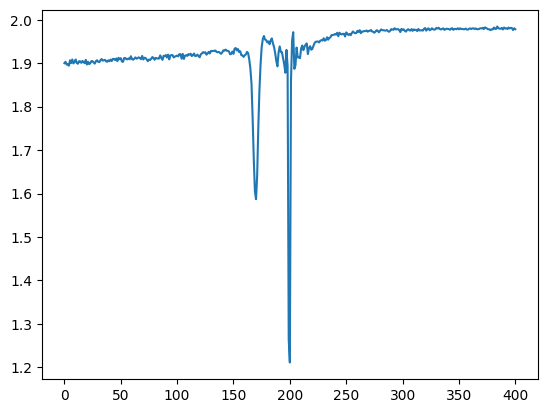

In [41]:
positions = np.arange(0,401)
print(athaliana[1].shape, dmelanogaster[1].shape)
plt.plot(positions, position_entropies)

#position_entropies = np.apply_along_axis(entropy, axis=1, arr=athaliana, base=2)
np.apply_along_axis(entropy, axis = 1, arr = (athaliana[1], dmelanogaster[1]), base = 2)


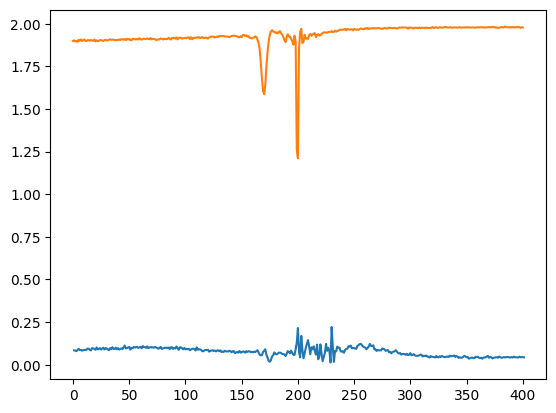

In [38]:
x = np.arange(1, 402)
plt.plot(x, hsapiens_dmelanogaster_kl)
plt.plot(positions, position_entropies)

In [85]:
n = 6
species = ["athaliana", "celegans", "dmelanogaster", "hsapiens", "pfalciparum", "scerevisiae"]
similarity_matrix = np.zeros((n, n))

for i in range(n):
    profile1 = convert_to_probability(parse_hmm("hmm_profiles/" + species[i] + "_200_hmm_profile.txt", 401), 0.25)
    for j in range(i, n):
        profile2 = convert_to_probability(parse_hmm("hmm_profiles/" + species[j] + "_200_hmm_profile.txt", 401), 0.25)
        
        divergence = kl_divergence(profile1, profile2).mean()
        similarity_matrix[i, j] = divergence
        similarity_matrix[j, i] = divergence


similarity_df = pd.DataFrame(similarity_matrix, index=species, columns=species)
print(similarity_df)




               athaliana  celegans  dmelanogaster  hsapiens  pfalciparum  \
athaliana       0.000000  0.019806       0.018296  0.128851     0.195374   
celegans        0.019806  0.000000       0.018266  0.113129     0.228063   
dmelanogaster   0.018296  0.018266       0.000000  0.076483     0.264441   
hsapiens        0.128851  0.113129       0.076483  0.000000     0.624605   
pfalciparum     0.195374  0.228063       0.264441  0.624605     0.000000   
scerevisiae     0.016424  0.026868       0.015053  0.124228     0.153456   

               scerevisiae  
athaliana         0.016424  
celegans          0.026868  
dmelanogaster     0.015053  
hsapiens          0.124228  
pfalciparum       0.153456  
scerevisiae       0.000000  


In [3]:
data = pd.read_csv("combined_dna_shape_table.csv")


In [10]:
n = 6
species = ["athaliana", "celegans", "dmelanogaster", "hsapiens", "pfalciparum", "scerevisiae"]
similarity_matrix = np.zeros((n, n))
similarity_df = pd.DataFrame(columns=["species1", "species2", "position", "kl_value"])

for i in range(n):
    profile1 = convert_to_probability(parse_hmm("hmm_profiles/" + species[i] + "_200_hmm_profile.txt", 401), 0.25)

    for j in range(i, n):
        profile2 = convert_to_probability(parse_hmm("hmm_profiles/" + species[j] + "_200_hmm_profile.txt", 401), 0.25)
        
        divergence = kl_divergence(profile1, profile2)
        print(divergence)

        df = pd.DataFrame({
            'species1': [species[i]] * len(divergence),
            'species2': [species[j]] * len(divergence),
            'position': np.arange(-200, 201), 
            'kl_value': divergence
        })
        similarity_df = pd.concat([similarity_df, df], ignore_index=True)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/var/folders/w_/k36py1jd4dj_978p497371vr0000gn/T/ipykernel_65232/3876563213.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  similarity_df = pd.concat([similarity_df, df], ignore_index=True)


[0.1330633  0.12898282 0.13967513 0.136851   0.14309723 0.12685185
 0.13939817 0.12524132 0.13766992 0.13219907 0.13433106 0.13437354
 0.14292207 0.14069433 0.13280962 0.13837318 0.13550704 0.14310757
 0.14441143 0.13373358 0.14935245 0.13764886 0.1467735  0.14545075
 0.13473443 0.13955508 0.15053856 0.14150742 0.13912757 0.13936954
 0.14348097 0.13848732 0.13927973 0.13197607 0.14454106 0.13987239
 0.13932673 0.14796907 0.14131594 0.14518247 0.14158862 0.1423106
 0.13913878 0.13548545 0.1447494  0.15460477 0.14056613 0.14840954
 0.14165228 0.14919554 0.13227243 0.14860535 0.15214671 0.14498825
 0.14438885 0.14434024 0.15710518 0.14419025 0.1478425  0.14732153
 0.14468771 0.15049249 0.15670124 0.15005242 0.14889786 0.15349743
 0.14647226 0.15335702 0.15492614 0.14736583 0.15701108 0.146805
 0.15277734 0.15796809 0.15817358 0.15199809 0.16508521 0.1571357
 0.14968011 0.14915971 0.15871021 0.15688072 0.15628808 0.16531147
 0.15571939 0.1462961  0.15827414 0.16829167 0.15202889 0.1561215


In [95]:
similarity_df.to_csv("kl_divergence_table.csv", index=False)

In [14]:
shapes = pd.read_csv("combined_dna_shape_table.csv")

filtered_data = shapes[(shapes['source'] == 'raw') & (shapes['position'] >= -185) & (shapes['position'] <= 185)]

results = []

species_list = filtered_data['species'].unique()
property_list = filtered_data['property'].unique()


for prop in property_list:
    prop_data = filtered_data[filtered_data['property'] == prop]
    

    for species1, species2 in combinations(species_list, 2):

        values_species1 = prop_data[prop_data['species'] == species1]['value'].values
        values_species2 = prop_data[prop_data['species'] == species2]['value'].values
        

        if len(values_species1) == 371 and len(values_species2) == 371:
            cosine_similarity = dot(values_species1, values_species2) / (norm(values_species1) * norm(values_species2))

            results.append({
                'species1': species1,
                'species2': species2,
                'property': prop,
                'cosine_similarity': cosine_similarity
            })

similarity_df = pd.DataFrame(results)
print(similarity_df)

similarity_df.to_csv("cosine_shapes_similarity.csv", index=False)

          species1       species2 property  cosine_similarity
0        athaliana       celegans   Buckle           0.240127
1        athaliana  dmelanogaster   Buckle          -0.048825
2        athaliana       hsapiens   Buckle           0.451897
3        athaliana    pfalciparum   Buckle          -0.106003
4        athaliana    scerevisiae   Buckle          -0.085478
..             ...            ...      ...                ...
190  dmelanogaster    pfalciparum     Tilt           0.226252
191  dmelanogaster    scerevisiae     Tilt           0.303902
192       hsapiens    pfalciparum     Tilt           0.254655
193       hsapiens    scerevisiae     Tilt           0.261747
194    pfalciparum    scerevisiae     Tilt          -0.022864

[195 rows x 4 columns]


In [ ]:
### Calculate divergence for shape sequences